In [258]:
import pandas as pd
import seaborn as sns
from remove_outliers import remove_outliers_iqr
import matplotlib.pyplot as plt
import numpy as np

In [259]:
stations_df=pd.read_csv("./stations.csv")

station_day=pd.read_csv("./station_day.csv")

city_hour=pd.read_csv("./city_hour.csv")

In [260]:
#station_df
stations_df.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [261]:
stations_df.shape

(230, 5)

In [262]:
stations_df.describe()

,StationId,StationName,City,State,Status
count,230,230,230,230,133
unique,230,230,127,21,2
top,AP001,"Secretariat, Amaravati - APPCB",Delhi,Delhi,Active
freq,1,1,38,38,131


In [299]:
stations_df["City"].value_counts()

City
Delhi        38
Bengaluru    10
Mumbai       10
Kolkata       7
Hyderabad     6
             ..
Varanasi      1
Durgapur      1
Asansol       1
Haldia        1
Siliguri      1
Name: count, Length: 127, dtype: int64

In [263]:
#dropping status column
stations_df.drop(columns=["Status"],inplace=True)

In [264]:
stations_df.to_csv('cleaned_stations.csv', index=False)

In [265]:
stations_df.head()

,StationId,StationName,City,State
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh


In [266]:
stations_df["State"].value_counts()

State
Delhi             38
Haryana           29
Uttar Pradesh     26
Maharashtra       22
Karnataka         20
Madhya Pradesh    16
West Bengal       14
Rajasthan         10
Bihar             10
Punjab             8
Kerala             8
Gujarat            6
Telangana          6
Andhra Pradesh     5
Tamil Nadu         5
Odisha             2
Assam              1
Chandigarh         1
Jharkhand          1
Meghalaya          1
Mizoram            1
Name: count, dtype: int64

In [267]:
#city_df

city_day_df=pd.read_csv("./station_hour.csv")
city_day_df.head()

C:\Users\MOHIT KUMAR DORA\AppData\Local\Temp\ipykernel_5972\253115992.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  city_day_df=pd.read_csv("./station_hour.csv")


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [268]:
city_day_df.shape

(2589083, 16)

In [269]:
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1.941394e+06,1.469831e+06,2.035372e+06,2.060110e+06,2.098275e+06,1.352465e+06,2.089781e+06,1.846346e+06,1.863110e+06,1.727504e+06,1.546717e+06,513979.000000,2.018893e+06
mean,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.305493e+00,1.490266e+01,2.448881,1.801730e+02
std,8.947618e+01,1.397883e+02,4.846146e+01,3.497508e+01,5.590894e+01,2.753244e+01,6.292445e+00,1.467385e+01,4.710653e+01,1.214053e+01,3.329729e+01,8.973470,1.404095e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,5.000000e+00
25%,2.816000e+01,6.400000e+01,3.050000e+00,1.310000e+01,1.135000e+01,1.123000e+01,4.100000e-01,4.250000e+00,1.102000e+01,8.000000e-02,3.400000e-01,0.000000,8.400000e+01
50%,5.259000e+01,1.162500e+02,7.150000e+00,2.479000e+01,2.286000e+01,2.235000e+01,8.000000e-01,8.250000e+00,2.475000e+01,9.600000e-01,3.400000e+00,0.200000,1.310000e+02
75%,9.774000e+01,2.040000e+02,1.858000e+01,4.548000e+01,4.570000e+01,3.778000e+01,1.380000e+00,1.453000e+01,4.953000e+01,3.230000e+00,1.510000e+01,1.830000,2.590000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,499.990000,3.133000e+03


In [270]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [271]:
city_day_df.isna().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

In [272]:
#fill numerical field
float_col=city_day_df.select_dtypes(include="float64").columns
for i in float_col:
    city_day_df[i].fillna(city_day_df[i].mean(),inplace=True)
float_col

C:\Users\MOHIT KUMAR DORA\AppData\Local\Temp\ipykernel_5972\2582362189.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  city_day_df[i].fillna(city_day_df[i].mean(),inplace=True)


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [273]:
city_day_df = remove_outliers_iqr(city_day_df, float_col)

In [274]:
city_day_df.shape

(2589083, 16)

In [275]:
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06
mean,6.055410e+01,1.322261e+02,1.289328e+01,2.783899e+01,2.768351e+01,2.654203e+01,9.973532e-01,9.358643e+00,2.881932e+01,2.140448e+00,9.964908e+00,2.448881e+00,1.578965e+02
std,3.044746e+01,4.563771e+01,1.022894e+01,1.500406e+01,1.704689e+01,5.033708e+00,6.211958e-01,4.498125e+00,1.551815e+01,1.661928e+00,7.352767e+00,7.549518e-15,7.858440e+01
min,1.000000e-02,1.790000e+01,1.000000e-02,1.000000e-02,0.000000e+00,1.032000e+01,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,2.448881e+00,5.000000e+00
25%,3.550000e+01,1.080000e+02,3.890000e+00,1.568000e+01,1.383000e+01,2.654203e+01,5.000000e-01,5.750000e+00,1.573000e+01,3.800000e-01,2.000000e+00,2.448881e+00,9.800000e+01
50%,6.055410e+01,1.584839e+02,1.100000e+01,2.783899e+01,2.768351e+01,2.870856e+01,9.973532e-01,9.680000e+00,2.881932e+01,2.140448e+00,1.253000e+01,2.448881e+00,1.578965e+02
75%,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.305493e+00,1.490266e+01,2.448881e+00,1.801730e+02
max,1.489100e+02,2.428300e+02,5.113000e+01,7.198000e+01,8.063000e+01,3.974000e+01,3.000000e+00,2.166000e+01,7.156000e+01,7.690000e+00,3.425000e+01,2.448881e+00,3.650000e+02


<Axes: xlabel='AQI'>

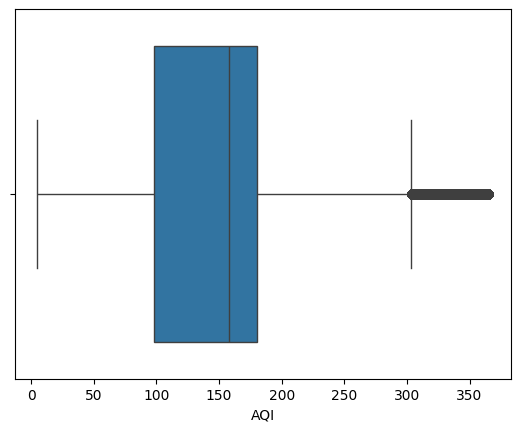

In [276]:
sns.boxplot(x=city_day_df["AQI"],data=city_day_df)

In [277]:
city_day_df.shape

(2589083, 16)

In [278]:
(city_day_df["AQI"]>200).sum()

np.int64(480789)

In [279]:
city_day_df.drop(columns=["AQI","AQI_Bucket","Benzene","Toluene","Xylene"],inplace=True)

In [280]:
def calculator(pm25,pm10,no2,so2,co,o3):
    def calculate_sub_index(concentration, breakpoints):
        for (C_low, C_high, I_low, I_high) in breakpoints:
            if C_low <= concentration <= C_high:
                return ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
        return 0

    # Breakpoint tables
    pm25_breakpoints = [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)]
    pm10_breakpoints = [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)]
    no2_breakpoints = [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 2049, 301, 500)]
    so2_breakpoints = [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 1004, 301, 500)]
    co_breakpoints = [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 50.4, 301, 500)]
    o3_breakpoints = [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 400, 301, 500)]

    # Calculate sub-indices
    pm25_index = calculate_sub_index(pm25*10, pm25_breakpoints)
    pm10_index = calculate_sub_index(pm10, pm10_breakpoints)
    no2_index = calculate_sub_index(no2, no2_breakpoints)
    so2_index = calculate_sub_index(so2, so2_breakpoints)
    co_index = calculate_sub_index(co, co_breakpoints)
    o3_index = calculate_sub_index(o3, o3_breakpoints)

    # Overall AQI
    aqi = max(pm25_index, pm10_index, no2_index, so2_index, co_index, o3_index)
    # aqi=25

    # Determine AQI category
    def get_aqi_category(aqi):
        if 0 <= aqi <= 50:
            return 'Satisfactory'
        elif 51 <= aqi <= 100:
            return 'Good'
        elif 101 <= aqi <= 150:
            return 'Moderate'
        elif 151 <= aqi <= 200:
            return 'Poor'
        elif 201 <= aqi <= 300:
            return 'Very Poor'
        elif 301 <= aqi <= 500:
            return 'Severe'
        else:
            return 'Out of Range'

    aqi_category = get_aqi_category(int(aqi))

    return aqi,aqi_category


In [281]:

city_day_df[['AQI', 'AQI_Category']]=city_day_df.apply(lambda x:pd.Series(calculator(x["PM2.5"],x["PM10"],x["NO2"],x["SO2"],x["CO"],x["O3"])),axis=1)


In [282]:
city_day_df = remove_outliers_iqr(city_day_df, ["AQI"])

In [283]:
(city_day_df["AQI"]>250).sum()

np.int64(505666)

In [284]:
city_day_df=city_day_df.reset_index(drop=True)

In [285]:
city_day_df.shape

(2589083, 13)

In [286]:
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06
mean,6.055410e+01,1.322261e+02,1.289328e+01,2.783899e+01,2.768351e+01,2.654203e+01,9.973532e-01,9.358643e+00,2.881932e+01,1.604358e+02
std,3.044746e+01,4.563771e+01,1.022894e+01,1.500406e+01,1.704689e+01,5.033708e+00,6.211958e-01,4.498125e+00,1.551815e+01,1.025115e+02
min,1.000000e-02,1.790000e+01,1.000000e-02,1.000000e-02,0.000000e+00,1.032000e+01,0.000000e+00,1.000000e-02,1.000000e-02,5.795455e+00
25%,3.550000e+01,1.080000e+02,3.890000e+00,1.568000e+01,1.383000e+01,2.654203e+01,5.000000e-01,5.750000e+00,1.573000e+01,1.027244e+02
50%,6.055410e+01,1.584839e+02,1.100000e+01,2.783899e+01,2.768351e+01,2.870856e+01,9.973532e-01,9.680000e+00,2.881932e+01,1.027244e+02
75%,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,1.906027e+02
max,1.489100e+02,2.428300e+02,5.113000e+01,7.198000e+01,8.063000e+01,3.974000e+01,3.000000e+00,2.166000e+01,7.156000e+01,4.464874e+02


In [287]:
city_day_df['Datetime'] = pd.to_datetime(city_day_df['Datetime']).dt.date

In [288]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   StationId     object 
 1   Datetime      object 
 2   PM2.5         float64
 3   PM10          float64
 4   NO            float64
 5   NO2           float64
 6   NOx           float64
 7   NH3           float64
 8   CO            float64
 9   SO2           float64
 10  O3            float64
 11  AQI           float64
 12  AQI_Category  object 
dtypes: float64(10), object(3)
memory usage: 256.8+ MB


In [289]:
city_day_df["AQI_Category"].value_counts()

AQI_Category
Moderate        1108489
Good             556488
Severe           513810
Very Poor        219029
Poor             161325
Satisfactory      29942
Name: count, dtype: int64

In [290]:
city_day_df.to_csv('cleaned_station_hour_.csv', index=False)

In [291]:
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06
mean,6.055410e+01,1.322261e+02,1.289328e+01,2.783899e+01,2.768351e+01,2.654203e+01,9.973532e-01,9.358643e+00,2.881932e+01,1.604358e+02
std,3.044746e+01,4.563771e+01,1.022894e+01,1.500406e+01,1.704689e+01,5.033708e+00,6.211958e-01,4.498125e+00,1.551815e+01,1.025115e+02
min,1.000000e-02,1.790000e+01,1.000000e-02,1.000000e-02,0.000000e+00,1.032000e+01,0.000000e+00,1.000000e-02,1.000000e-02,5.795455e+00
25%,3.550000e+01,1.080000e+02,3.890000e+00,1.568000e+01,1.383000e+01,2.654203e+01,5.000000e-01,5.750000e+00,1.573000e+01,1.027244e+02
50%,6.055410e+01,1.584839e+02,1.100000e+01,2.783899e+01,2.768351e+01,2.870856e+01,9.973532e-01,9.680000e+00,2.881932e+01,1.027244e+02
75%,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,1.906027e+02
max,1.489100e+02,2.428300e+02,5.113000e+01,7.198000e+01,8.063000e+01,3.974000e+01,3.000000e+00,2.166000e+01,7.156000e+01,4.464874e+02


In [292]:
city_day_df.isna().sum()

StationId       0
Datetime        0
PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
AQI             0
AQI_Category    0
dtype: int64

In [293]:
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06,2.589083e+06
mean,6.055410e+01,1.322261e+02,1.289328e+01,2.783899e+01,2.768351e+01,2.654203e+01,9.973532e-01,9.358643e+00,2.881932e+01,1.604358e+02
std,3.044746e+01,4.563771e+01,1.022894e+01,1.500406e+01,1.704689e+01,5.033708e+00,6.211958e-01,4.498125e+00,1.551815e+01,1.025115e+02
min,1.000000e-02,1.790000e+01,1.000000e-02,1.000000e-02,0.000000e+00,1.032000e+01,0.000000e+00,1.000000e-02,1.000000e-02,5.795455e+00
25%,3.550000e+01,1.080000e+02,3.890000e+00,1.568000e+01,1.383000e+01,2.654203e+01,5.000000e-01,5.750000e+00,1.573000e+01,1.027244e+02
50%,6.055410e+01,1.584839e+02,1.100000e+01,2.783899e+01,2.768351e+01,2.870856e+01,9.973532e-01,9.680000e+00,2.881932e+01,1.027244e+02
75%,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,1.906027e+02
max,1.489100e+02,2.428300e+02,5.113000e+01,7.198000e+01,8.063000e+01,3.974000e+01,3.000000e+00,2.166000e+01,7.156000e+01,4.464874e+02


In [294]:
city_day_df.isna().sum()

StationId       0
Datetime        0
PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
AQI             0
AQI_Category    0
dtype: int64

In [295]:
# sns.violinplot(data=city_day_df)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'NOx'}>,
        <Axes: title={'center': 'NH3'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >]],
      dtype=object)

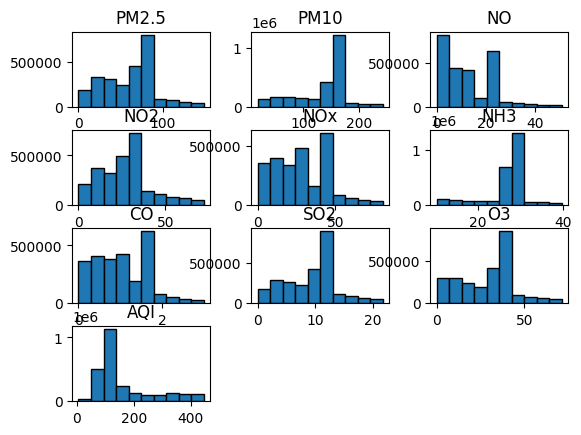

In [296]:
city_day_df.hist(bins=10, edgecolor='black', grid=False)

<Axes: xlabel='AQI'>

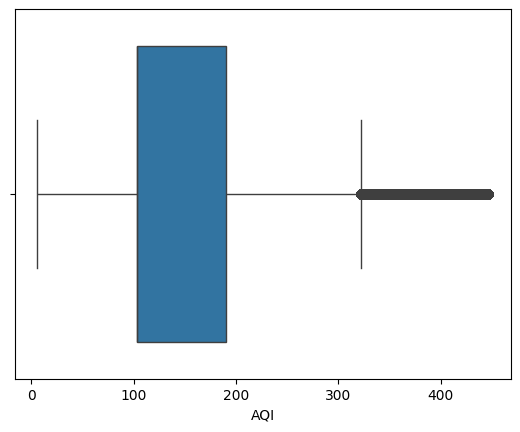

In [297]:
sns.boxplot(x=city_day_df["AQI"],data=city_day_df)